<a href="https://colab.research.google.com/github/Saeif-Saleh/AppPortfolio/blob/master/classify_different_usrp_overair_175MHz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
# !pip install --upgrade tensorflow

Fri Mar  6 01:40:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import scipy.io
import numpy as np

In [0]:
matlab_data=scipy.io.loadmat('/content/drive/My Drive/thesis_data/Usrps_in_175.mat')

In [4]:
print(list(matlab_data.keys())[3:])

['R2_T3_test', 'R2_T3_train', 'R2_T4_test', 'R2_T4_train', 'R2_T5_test', 'T5_train']


In [0]:
usrp3_train=matlab_data['R2_T3_train']
usrp4_train=matlab_data['R2_T4_train']
usrp5_train=matlab_data['T5_train']

In [6]:
print(usrp3_train.shape)
print(usrp4_train.shape)
print(usrp5_train.shape)

(42227312, 2)
(44468039, 2)
(47525497, 2)


In [0]:
# usrp3_train=usrp3_train.reshape(-1,2)
# usrp4_train=usrp4_train.reshape(-1,2)
# usrp5_train=usrp5_train.reshape(-1,2)
# print(usrp3_train.shape)
# print(usrp4_train.shape)
# print(usrp5_train.shape)

In [0]:
usrp3_test=matlab_data['R2_T3_test']
usrp4_test=matlab_data['R2_T4_test']
usrp5_test=matlab_data['R2_T5_test']

In [9]:
print(usrp5_test.shape)
print(usrp4_test.shape)
print(usrp3_test.shape)

(14201866, 2)
(15826335, 2)
(15493411, 2)


In [0]:
usrp3_train=usrp3_train[1000000:17777216]
usrp4_train=usrp4_train[1000000:17777216]
usrp5_train=usrp5_train[1000000:17777216]

In [0]:
usrp3_test=usrp3_test[1000000:5194304]
usrp4_test=usrp4_test[1000000:5194304]
usrp5_test=usrp5_test[1000000:5194304]

In [12]:
train_x=np.concatenate((usrp3_train,usrp4_train,usrp5_train),axis=0)
test_x=np.concatenate((usrp3_test,usrp4_test,usrp5_test),axis=0)
print(train_x.shape)
print(test_x.shape)


(50331648, 2)
(12582912, 2)


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
n_classes=3
sample_size=128

In [0]:
train_x=train_x.reshape(-1,2,sample_size)
test_x=test_x.reshape(-1,2,sample_size)

In [16]:
#Creating train_y
train_y=np.zeros(len(train_x))
seprator=int(len(train_y)/n_classes)
print(seprator)
train_y[0:seprator]=0
train_y[seprator:2*seprator]=1
train_y[2*seprator:]=2
# Creating test_y
test_y=np.zeros(len(test_x))
seprator=int(len(test_y)/n_classes)
test_y[0:seprator]=0
test_y[seprator:2*seprator]=1
test_y[2*seprator:]=2


131072


In [0]:
train_y=tf.keras.utils.to_categorical(
    train_y,
    num_classes=n_classes,
    dtype='float32'
)
test_y=tf.keras.utils.to_categorical(
    test_y,
    num_classes=n_classes,
    dtype='float32'
)

In [18]:
print(train_x.shape)
print(train_y.shape)

(393216, 2, 128)
(393216, 3)


In [0]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.20, shuffle= True)


In [0]:
img_rows=sample_size
img_cols=2
train_x = train_x.reshape(-1, img_rows, img_cols, 1)
valid_x = valid_x.reshape(-1, img_rows, img_cols, 1)
test_x=test_x.reshape(-1,img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [21]:
print(len(train_x))
print(len(valid_x))

314572
78644


In [22]:
train_x.shape

(314572, 128, 2, 1)

In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(64, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(128, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(256, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [24]:
conv_model=create_model()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 314572 samples, validate on 78644 samples
Epoch 1/10
314572/314572 [==============================] - 93s 296us/sample - loss: 0.2636 - acc: 0.9063 - val_loss: 0.3476 - val_acc: 0.9557
Epoch 2/10
314572/314572 [==============================] - 91s 289us/sample - loss: 0.0973 - acc: 0.9797 - val_loss: 0.0133 - val_acc: 0.9982
Epoch 3/10
314572/314572 [==============================] - 91s 291us/sample - loss: 0.0746 - acc: 0.9857 - val_loss: 0.0202 - val_acc: 0.9975
Epoch 4/10
314572/314572 [==============================] - 91s 290us/sample - loss: 0.0679 - acc: 0.9881 - val_loss: 0.0123 - val_acc: 0.9984
Epoch 5/10
314572/314572 [==============================] - 91s 288us/sample - loss: 0.0595 - acc: 0.9894 - val_loss: 0.0413 - val_acc: 0.9912
Epoch 6/10
314572/314572 [==============================] - 91s 288us/sample - loss: 0.0578 - acc: 0.9901 - val_loss: 0.0196 - val_acc: 0.9986
Epoch 7/10

In [0]:
from sklearn.utils import shuffle
test_x,test_y=shuffle(test_x,test_y)

In [26]:
conv_model.evaluate(test_x,test_y)

98304/98304 [==============================] - 9s 95us/sample - loss: 0.0375 - acc: 0.9926


[0.037497711338047766, 0.9925639]

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:
matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))

None


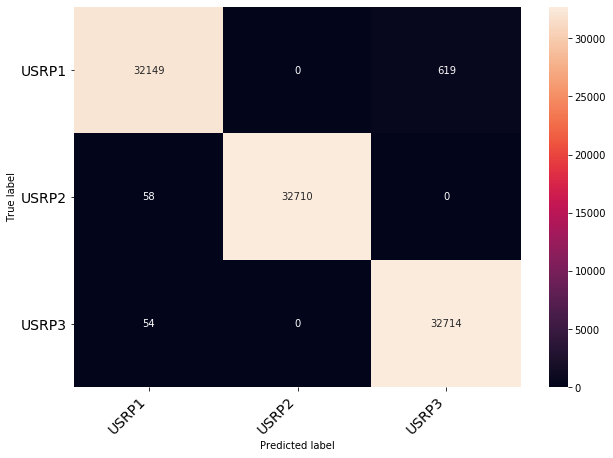

In [31]:
print(print_confusion_matrix(matrix,['USRP1','USRP2','USRP3']))